In [2]:
import pandas as pd
import numpy as np
import csv
import os
from datetime import datetime
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
#Activate the first option if whole column width is necessary and the second to make all columns visible
#pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', 999)

## I. Import the processed dataset

In [4]:
#Get the report and store it into a dataframe. Check what columns are included in the file
report = pd.read_csv('PMNET_processed_v2.csv', dtype = str, index_col = 0)
print(report.columns)
print(report.shape)

Index(['IWPNumber', 'ProjectName', '***Year***', 'ProjectStage',
       'Stage1aStart', 'Stage1aFinish', 'Stage1bFinish', 'Stage1cFinish',
       'Stage2aFinish', 'Stage2bFinish', 'Stage2cFinish', 'Stage3aFinish',
       'Stage3bFinish', 'Stage3cFinish', 'Stage4aFinish', 'Stage4bStart',
       'Stage4bFinish', 'Stage4cFinish', 'Stage5aFinish', 'Stage5bFinish',
       'Stage6Finish', 'LatestWorksCost', 'BudgetCode', 'DeliveryType',
       'District', 'Town/Parish', 'ClientCommissioning',
       '***Assistantteamleader***', 'Groupsponsor', 'ProjectManager',
       'TeamLeader', '***AssistantPM***', 'CCDivision', 'IWPCode', 'USRNs',
       'UnitIDs'],
      dtype='object')
(24125, 36)


In [5]:
report.head(5)

,IWPNumber,ProjectName,***Year***,ProjectStage,Stage1aStart,Stage1aFinish,Stage1bFinish,Stage1cFinish,Stage2aFinish,Stage2bFinish,Stage2cFinish,Stage3aFinish,Stage3bFinish,Stage3cFinish,Stage4aFinish,Stage4bStart,Stage4bFinish,Stage4cFinish,Stage5aFinish,Stage5bFinish,Stage6Finish,LatestWorksCost,BudgetCode,DeliveryType,District,Town/Parish,ClientCommissioning,***Assistantteamleader***,Groupsponsor,ProjectManager,TeamLeader,***AssistantPM***,CCDivision,IWPCode,USRNs,UnitIDs
0,DRN130013-1,Harmer Green Lane Drainage Scheme Works,2019,5,Undefined,23/02/2018,01/05/2019,08/05/2019,15/05/2019,10/06/2019,05/07/2019,05/07/2019,05/07/2019,Undefined,26/08/2019,26/08/2019,01/11/2019,15/11/2019,31/03/2020,Undefined,15/11/2020,141073.06,DRN,HST/HST,MW: 0-Welwyn Hatfield Area,Digswell,Mark Craig,Undefined,Undefined,Noel McQuaid,Undefined,Shamil Shah,77,DRS,43008224;43007795;43012151,C182/20
1,DRN130013-1,Harmer Green Lane Drainage Scheme Works,2019,5,Undefined,23/02/2018,01/05/2019,08/05/2019,15/05/2019,10/06/2019,05/07/2019,05/07/2019,05/07/2019,Undefined,26/08/2019,26/08/2019,01/11/2019,15/11/2019,31/03/2020,Undefined,15/11/2020,141073.06,DRN,HST/HST,MW: 0-Welwyn Hatfield Area,Digswell,Mark Craig,Undefined,Undefined,Noel McQuaid,Undefined,Shamil Shah,77,DRS,43008224;43007795;43012151,C49/10
2,DRN130013-1,Harmer Green Lane Drainage Scheme Works,2019,5,Undefined,23/02/2018,01/05/2019,08/05/2019,15/05/2019,10/06/2019,05/07/2019,05/07/2019,05/07/2019,Undefined,26/08/2019,26/08/2019,01/11/2019,15/11/2019,31/03/2020,Undefined,15/11/2020,141073.06,DRN,HST/HST,MW: 0-Welwyn Hatfield Area,Digswell,Mark Craig,Undefined,Undefined,Noel McQuaid,Undefined,Shamil Shah,77,DRS,43008224;43007795;43012151,C49/20
3,DRN130013-1,Harmer Green Lane Drainage Scheme Works,2019,5,Undefined,23/02/2018,01/05/2019,08/05/2019,15/05/2019,10/06/2019,05/07/2019,05/07/2019,05/07/2019,Undefined,26/08/2019,26/08/2019,01/11/2019,15/11/2019,31/03/2020,Undefined,15/11/2020,141073.06,DRN,HST/HST,MW: 0-Welwyn Hatfield Area,Digswell,Mark Craig,Undefined,Undefined,Noel McQuaid,Undefined,Shamil Shah,77,DRS,43008224;43007795;43012151,0U55/10
4,CWY130429-1,Portland Street Resurfacing,2018,5,Undefined,Undefined,Undefined,Undefined,Undefined,Undefined,Undefined,Undefined,Undefined,Undefined,04/10/2018,04/10/2018,04/10/2018,01/01/2020,01/02/2020,Undefined,31/03/2021,17002,CWY,SMF/CRC,MW: 6-St Albans Area,St Albans,Chris Allen-Smith,Undefined,Undefined,Rachael Stephens,Undefined,Undefined,51,CSI,37313821,6U439/10


### Distribution of instances per year

In [6]:
report['***Year***'].value_counts()

2013         2661
2014         2277
Undefined    2263
2018         2148
2015         1948
2016         1882
2017         1847
2019         1523
2011         1489
2010         1338
2009         1242
2012         1021
2008          885
2007          811
2006          561
2005           74
2020           73
2021           34
0              33
2004           14
2022            1
Name: ***Year***, dtype: int64

In [7]:
#Clear the Undefined rows and set them to Zero, to mark them as null
report = report.replace('Undefined',0)
report['***Year***'] = report['***Year***'].astype(int)
year_df = report.sort_values(['***Year***']).reset_index(drop=True)

Text(0, 0.5, 'Count')

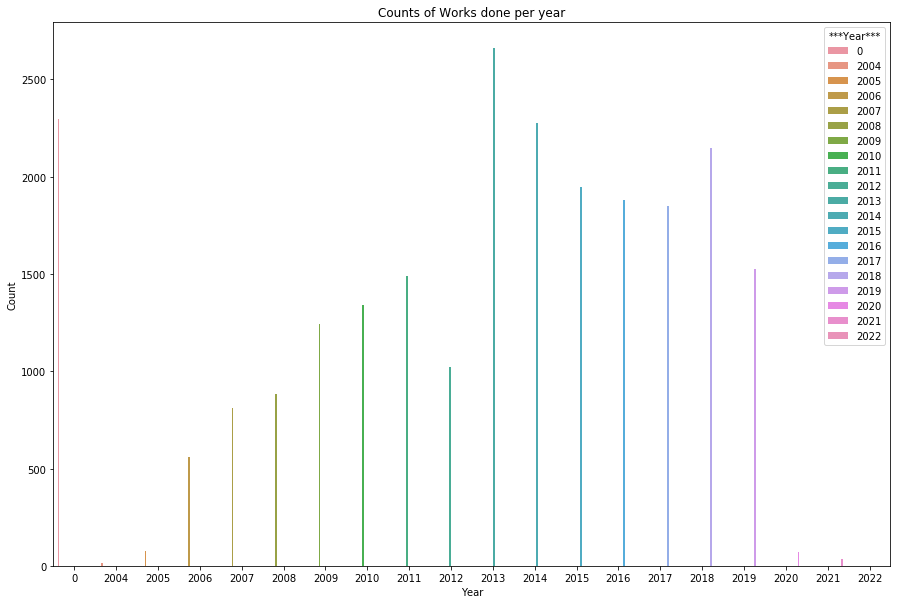

In [8]:
#Plot the number of works per year

plt.figure(figsize=(15, 10))
ax = sns.countplot(x="***Year***", data=year_df, hue='***Year***')
ax.set_title('Counts of Works done per year')

#handles, _ = ax.get_legend_handles_labels()
#ax.legend(handles, ["Terraced", "Detached","Flats","Semi terraced", "Others"])

ax.set_xlabel('Year')
ax.set_ylabel('Count')

### Distribution of instances per Budget Code

In [9]:
report['BudgetCode'].value_counts()

CWY    13259
MEM     3978
ARP     2274
DRN     1247
SAR     1214
WRC      793
NCM      546
CSC      469
DIS      326
DSC       19
Name: BudgetCode, dtype: int64

Text(0, 0.5, 'Count')

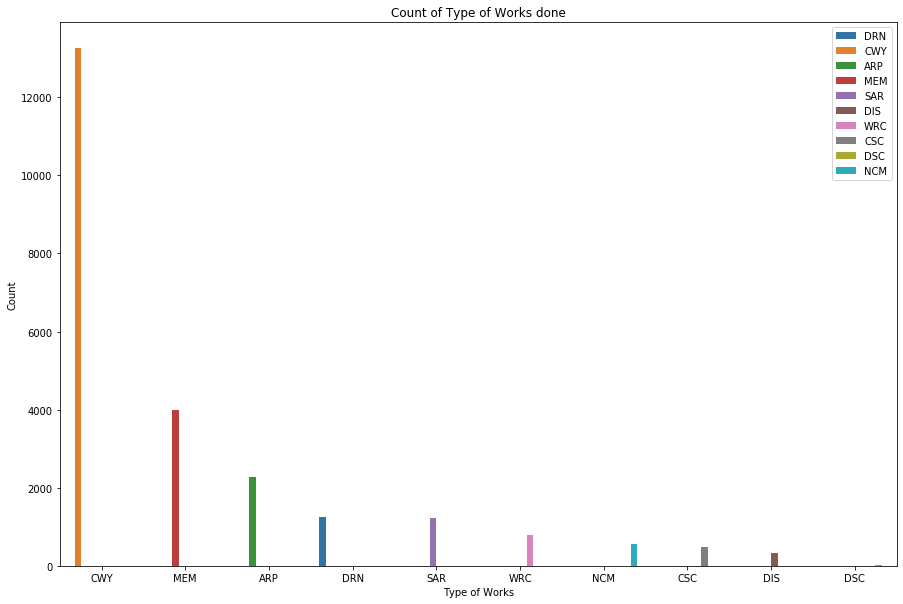

In [10]:
#Plot the number of works per year

plt.figure(figsize=(15, 10))
ax = sns.countplot(x="BudgetCode", data=report, hue='BudgetCode', order = report['BudgetCode'].value_counts().index)
ax.set_title('Count of Type of Works done')

#handles, _ = ax.get_legend_handles_labels()
#ax.legend(handles, ["Terraced", "Detached","Flats","Semi terraced", "Others"])

plt.legend(loc='upper right')

ax.set_xlabel('Type of Works')
ax.set_ylabel('Count')

In [11]:
#Show the number of works per district, divided by year
perbudget = year_df.groupby(['***Year***','BudgetCode']).agg({'BudgetCode': ['count']}).unstack(level = 0)
perbudget

BudgetCode                                                        \
                count                                                         
***Year***       0     2004  2005   2006   2007   2008   2009   2010   2011   
BudgetCode                                                                    
ARP             229.0   NaN   NaN   30.0   56.0   85.0  101.0   39.0  132.0   
CSC              74.0   NaN   NaN    NaN    NaN    NaN   61.0  158.0  122.0   
CWY            1325.0   1.0  16.0  309.0  564.0  592.0  756.0  505.0  796.0   
DIS             123.0   1.0  27.0   57.0   34.0   21.0   22.0   15.0   20.0   
DRN             126.0   NaN   NaN   30.0   53.0  128.0  104.0  111.0   98.0   
DSC               9.0   NaN   NaN    NaN    NaN    NaN    2.0    8.0    NaN   
MEM             122.0   NaN   NaN    NaN    NaN    NaN    NaN    NaN  108.0   
NCM               NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN   
SAR             150.0  12.0  31.0  135.0  104.0   59.0   65.0  264.0   98.0   
WRC             138.0   NaN   NaN    NaN    NaN    NaN  131.0  238.0  115.0   

                                                                          \
                                                                           
***Year***   2012    2013    2014    2015    2016    2017    2018   2019   
BudgetCode                                                                 
ARP         117.0   313.0   274.0   194.0   156.0   132.0   226.0  150.0   
CSC          49.0     5.0     NaN     NaN     NaN     NaN     NaN    NaN   
CWY         376.0  1531.0  1278.0  1237.0  1002.0  1091.0  1161.0  669.0   
DIS           4.0     2.0     NaN     NaN     NaN     NaN     NaN    NaN   
DRN          51.0    57.0    82.0    65.0    71.0    82.0    88.0   92.0   
DSC           NaN     NaN     NaN     NaN     NaN     NaN     NaN    NaN   
MEM         325.0   592.0   573.0   444.0   610.0   518.0   381.0  302.0   
NCM           NaN     NaN     NaN     NaN     NaN     NaN   257.0  286.0   
SAR          55.0    61.0    43.0     8.0    43.0    24.0    35.0   24.0   
WRC          44.0   100.0    27.0     NaN     NaN     NaN     NaN    NaN   

                             
                             
***Year***  2020  2021 2022  
BudgetCode                   
ARP         19.0  21.0  NaN  
CSC          NaN   NaN  NaN  
CWY         40.0   9.0  1.0  
DIS          NaN   NaN  NaN  
DRN          9.0   NaN  NaN  
DSC          NaN   NaN  NaN  
MEM          2.0   1.0  NaN  
NCM          3.0   NaN  NaN  
SAR          NaN   3.0  NaN  
WRC          NaN   NaN  NaN

Text(0, 0.5, 'Count')

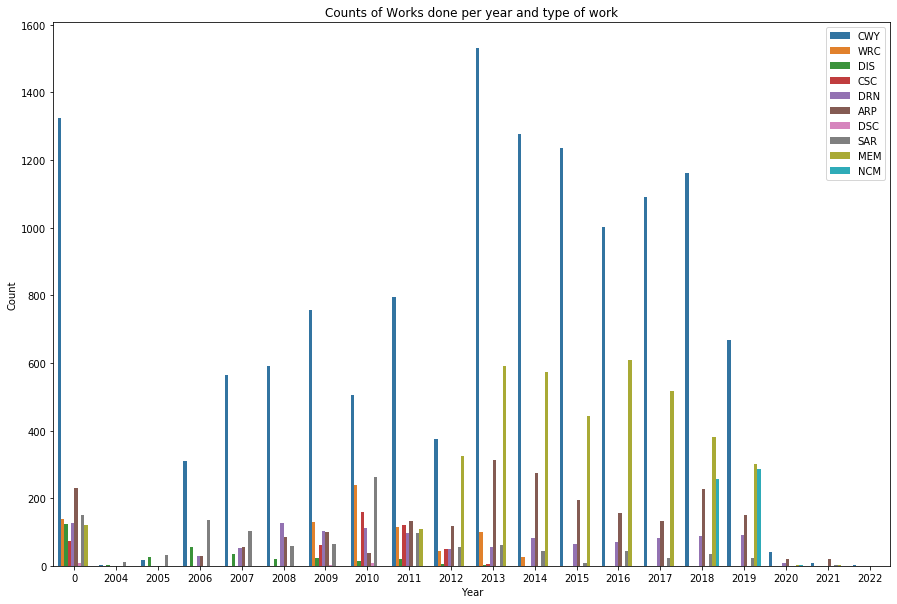

In [12]:
#Plot the number of works per year by type of work

plt.figure(figsize=(15, 10))
ax = sns.countplot(x="***Year***", data=year_df, hue='BudgetCode')
ax.set_title('Counts of Works done per year and type of work')

handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ["CWY", "MEM", "ARP", "DRN", "SAR", "WRC", "NCM", "CSC", "DIS", "DSC"])
plt.legend(loc='upper right')

ax.set_xlabel('Year')
ax.set_ylabel('Count')

### Distribution of Instances per District

In [13]:
report['District'].value_counts()

E: 3-East Herts District      4241
SW: 2-Dacorum Area            3115
MW: 6-St Albans Area          3051
N: 5-North Herts District     3048
MW: 0-Welwyn Hatfield Area    2510
MW: 4-Hertsmere District      1863
E: 1-Broxbourne Area          1699
N: 7-Stevenage Area           1656
SW: 8-3 Rivers District       1605
SW: 9-Watford Area            1241
0                               96
Name: District, dtype: int64

In [14]:
100*report['District'].value_counts(normalize=True)

E: 3-East Herts District      17.579275
SW: 2-Dacorum Area            12.911917
MW: 6-St Albans Area          12.646632
N: 5-North Herts District     12.634197
MW: 0-Welwyn Hatfield Area    10.404145
MW: 4-Hertsmere District       7.722280
E: 1-Broxbourne Area           7.042487
N: 7-Stevenage Area            6.864249
SW: 8-3 Rivers District        6.652850
SW: 9-Watford Area             5.144041
0                              0.397927
Name: District, dtype: float64

In [15]:
#Show the number of works per district, divided by year
perdistrict = year_df.groupby(['***Year***','District']).agg({'District': ['count']}).unstack(level = 0)
perdistrict

District                                         \
                              count                                          
***Year***                     0    2004  2005   2006   2007   2008   2009   
District                                                                     
0                              15.0  NaN   NaN    3.0    1.0    NaN    3.0   
E: 1-Broxbourne Area          135.0  NaN  12.0   45.0   42.0   44.0   62.0   
E: 3-East Herts District      278.0  1.0  31.0   85.0  180.0  192.0  188.0   
MW: 0-Welwyn Hatfield Area    303.0  1.0  12.0   61.0   82.0   86.0  144.0   
MW: 4-Hertsmere District      159.0  NaN   3.0   28.0   77.0   54.0   75.0   
MW: 6-St Albans Area          309.0  NaN   2.0   74.0   73.0  127.0  208.0   
N: 5-North Herts District     222.0  NaN   3.0   48.0  139.0  149.0  212.0   
N: 7-Stevenage Area           216.0  NaN   NaN   42.0   51.0   44.0   73.0   
SW: 2-Dacorum Area            331.0  9.0   2.0  108.0   94.0  128.0  161.0   
SW: 8-3 Rivers District       174.0  NaN   1.0   31.0   38.0   26.0   66.0   
SW: 9-Watford Area            154.0  3.0   8.0   36.0   34.0   35.0   50.0   

                                                                             \
                                                                              
***Year***                   2010   2011   2012   2013   2014   2015   2016   
District                                                                      
0                             7.0   19.0    4.0    8.0   15.0   13.0    5.0   
E: 1-Broxbourne Area         92.0  112.0   98.0  198.0  203.0  129.0  145.0   
E: 3-East Herts District    363.0  264.0  171.0  409.0  440.0  371.0  386.0   
MW: 0-Welwyn Hatfield Area   76.0   94.0  118.0  260.0  234.0  184.0  216.0   
MW: 4-Hertsmere District     82.0  121.0   58.0  208.0  200.0  166.0  150.0   
MW: 6-St Albans Area        203.0  218.0  123.0  385.0  214.0  240.0  212.0   
N: 5-North Herts District   162.0  167.0  133.0  330.0  249.0  159.0  233.0   
N: 7-Stevenage Area          41.0   72.0   64.0  154.0  159.0  179.0  148.0   
SW: 2-Dacorum Area          134.0  238.0  110.0  340.0  261.0  277.0  213.0   
SW: 8-3 Rivers District     101.0  123.0   57.0  202.0  178.0  149.0  102.0   
SW: 9-Watford Area           77.0   61.0   85.0  167.0  124.0   81.0   72.0   

                                                                  
                                                                  
***Year***                   2017   2018   2019  2020  2021 2022  
District                                                          
0                             NaN    1.0    2.0   NaN   NaN  NaN  
E: 1-Broxbourne Area        144.0  131.0   93.0   7.0   7.0  NaN  
E: 3-East Herts District    283.0  327.0  249.0  17.0   5.0  1.0  
MW: 0-Welwyn Hatfield Area  211.0  244.0  164.0   6.0  14.0  NaN  
MW: 4-Hertsmere District    153.0  194.0  125.0   5.0   5.0  NaN  
MW: 6-St Albans Area        213.0  256.0  185.0   8.0   1.0  NaN  
N: 5-North Herts District   253.0  341.0  239.0   9.0   NaN  NaN  
N: 7-Stevenage Area         156.0  170.0   87.0   NaN   NaN  NaN  
SW: 2-Dacorum Area          224.0  272.0  196.0  16.0   1.0  NaN  
SW: 8-3 Rivers District     127.0  138.0   91.0   NaN   1.0  NaN  
SW: 9-Watford Area           83.0   74.0   92.0   5.0   NaN  NaN

Text(0, 0.5, 'Count per District')

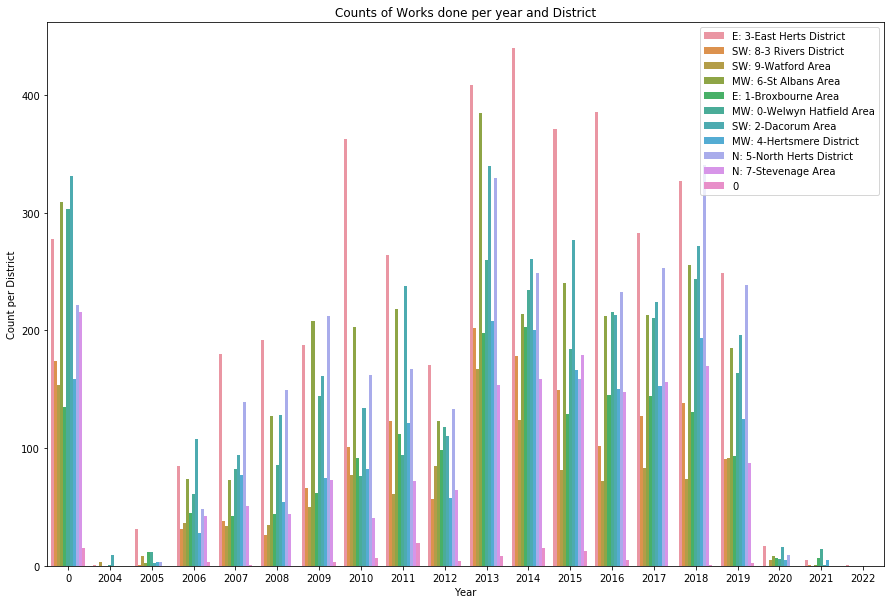

In [16]:
##Plot the evolution of works per district divided by year (Bar plot)

plt.figure(figsize=(15, 10))
ax = sns.countplot(x="***Year***", data=year_df, hue='District')
ax.set_title('Counts of Works done per year and District')

plt.legend(loc='upper right')
ax.set_xlabel('Year')
ax.set_ylabel('Count per District')

Text(0, 0.5, 'Count per District')

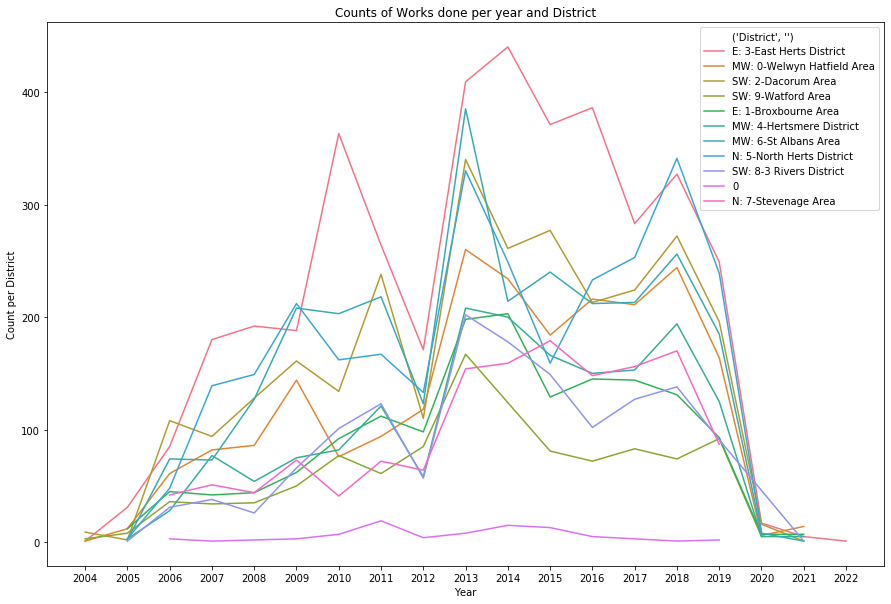

In [17]:
##Plot the evolution of works per district divided by year (Line plot) *Removing the null years
perdistrict3 = year_df[['***Year***','District']]
perdistrict3 = perdistrict3.drop(perdistrict3[(perdistrict3['***Year***'] == 0)].index)
perdistrict3['***Year***'] = perdistrict3['***Year***'].astype(str)
perdistrict4 = perdistrict3.groupby(['***Year***','District']).agg({'District': ['count']})
perdistrict4.reset_index(inplace = True)

plt.figure(figsize=(15, 10))
ax = sns.lineplot(x=('***Year***',      ''), y= (  'District', 'count'), data=perdistrict4, hue=(  'District',      ''))
ax.set_title('Counts of Works done per year and District')

plt.legend(loc='upper right')
ax.set_xlabel('Year')
ax.set_ylabel('Count per District')

### Project management counts

In [18]:
report.columns

Index(['IWPNumber', 'ProjectName', '***Year***', 'ProjectStage',
       'Stage1aStart', 'Stage1aFinish', 'Stage1bFinish', 'Stage1cFinish',
       'Stage2aFinish', 'Stage2bFinish', 'Stage2cFinish', 'Stage3aFinish',
       'Stage3bFinish', 'Stage3cFinish', 'Stage4aFinish', 'Stage4bStart',
       'Stage4bFinish', 'Stage4cFinish', 'Stage5aFinish', 'Stage5bFinish',
       'Stage6Finish', 'LatestWorksCost', 'BudgetCode', 'DeliveryType',
       'District', 'Town/Parish', 'ClientCommissioning',
       '***Assistantteamleader***', 'Groupsponsor', 'ProjectManager',
       'TeamLeader', '***AssistantPM***', 'CCDivision', 'IWPCode', 'USRNs',
       'UnitIDs'],
      dtype='object')

In [19]:
report['ClientCommissioning'].value_counts()

Chris Allen-Smith     14922
Jack Rivers            2799
Adrian Redrup          1580
Lorraine Bennetts      1016
Paul Selley             611
                      ...  
Rupert Thacker            1
Ian Thompson              1
Andy Turner[Old A]        1
Rachael Stephens          1
David Wilson              1
Name: ClientCommissioning, Length: 75, dtype: int64

In [20]:
report['***Assistantteamleader***'].value_counts()

0                                    21156
Dave Whelan[Old A]                    1858
Graham Beviss                          377
Bill Heale                             212
Richard Hennis                         149
Steven Allen[Old M]                    120
Rob Surridge                            67
Andy Turner[Old A]                      38
Peter Watson[Old A]                     37
Hein Moolman                            26
Robert Swears                           24
Geoff Dodding[Old M]                    19
Paul Patmore                            13
Paul Chappell[Old M]                     9
David Walker[Old M]                      5
Aziza Jeppe                              4
Bradley Joseph                           4
Angela Wong                              2
David Hemmingfield                       1
Kevin Gardiner - Stevenage[Old A]        1
Noel McQuaid                             1
Paul Roberts[Old A]                      1
Lance Holman                             1
Name: ***As

In [21]:
report['Groupsponsor'].value_counts()

0                    21994
Richard Jones          675
Rupert Thacker         502
Sanjay Patel           494
Chris Allen-Smith      460
Name: Groupsponsor, dtype: int64

In [22]:
report['ProjectManager'].value_counts()

Chris Stubbs          3994
Christopher Brown     2854
Andy Turner[Old A]    2414
Hein Moolman          1870
Sorin Zahan           1503
                      ... 
Mark Goodyear            1
Chris Hodges             1
Hamza Babar              1
Philip Camp              1
Ian Hollinrake           1
Name: ProjectManager, Length: 61, dtype: int64

In [23]:
report['TeamLeader'].value_counts()

0                       23051
Vicky Saunders            767
Richard Hennis            118
Silency Musingarabwi      111
Peter Gillard              59
Stuart Pearce              16
Ringway TL                  3
Name: TeamLeader, dtype: int64

In [24]:
report['***AssistantPM***'].value_counts()

0                     23214
Richard Tagliarini      542
Shamil Shah              62
Etinosa Aganmwonyi       40
Alexio Musimbe           39
Nadine Stockwell         38
Amey Sheth               36
Stoyan Bukikov           29
Omar Sheikh-Noor         27
Luke Roddy               24
Rafael Ligero            19
Ana Fuentes              13
Rajpal Sidhu              8
Mirka Singh               5
Yiannis Moukoulis         4
Ben Baylis                4
Kristen Ferma             3
Volkan Ulucay             3
Honor Young               3
Ringway APM               3
Tayssir Jenabi            3
Bradley Joseph            2
Nathan Walker             2
Miltos Nikolaidis         2
Name: ***AssistantPM***, dtype: int64

In [25]:
report['UnitIDs'].value_counts().head(25)

A1081/130    21
C101/30      19
A119/160     19
7U183/20     16
B1037/130    16
3U150/10     16
5U907/10     16
B1000/10     15
7U512/30     14
2U460/20     13
A1081/290    13
B651/170     13
C94/140      13
B651/20      13
B1004/220    13
B1037/120    13
5U353/10     12
2U727/10     12
6U58/50      12
A1081/280    12
C154/25      12
B653/190     11
6U57/10      11
C104/10      11
C163/20      11
Name: UnitIDs, dtype: int64

In [26]:
#report.loc[report['UnitIDs'] =='A1081']
#report[report.UnitIDs.isin(['6U57'])]
exp = report[report['UnitIDs'].str.contains("A1081/130")]
#exp['***Year***'].value_counts()

In [27]:
exp.loc[exp['***Year***']==2010].head(5)

,IWPNumber,ProjectName,***Year***,ProjectStage,Stage1aStart,Stage1aFinish,Stage1bFinish,Stage1cFinish,Stage2aFinish,Stage2bFinish,Stage2cFinish,Stage3aFinish,Stage3bFinish,Stage3cFinish,Stage4aFinish,Stage4bStart,Stage4bFinish,Stage4cFinish,Stage5aFinish,Stage5bFinish,Stage6Finish,LatestWorksCost,BudgetCode,DeliveryType,District,Town/Parish,ClientCommissioning,***Assistantteamleader***,Groupsponsor,ProjectManager,TeamLeader,***AssistantPM***,CCDivision,IWPCode,USRNs,UnitIDs
5845,WRC100018-1,Harpenden Road Resurfacing Pre Patching,2010,Z,0,0,0,0,0,0,0,06/05/2010,24/05/2010,0,08/09/2010,09/09/2010,27/09/2010,25/10/2010,31/03/2011,0,23/05/2012,67962,WRC,SOR/SOR,MW: 6-St Albans Area,St Albans,Jack Rivers,0,0,Richard Hennis,0,0,50,WAS,37307803,A1081/130
6569,SAR100025-1,School Crossing Patrol Sites 10/11 Countywide ...,2010,Z,0,0,0,0,29/10/2010,08/12/2010,09/12/2010,20/12/2010,04/01/2011,0,11/02/2011,11/02/2011,04/03/2011,04/05/2011,15/09/2011,0,10/09/2012,1968,SAR,SOR/SOR,E: 3-East Herts District,Hertford,Rob Surridge,Bill Heale,0,Rachel Jackson[Old M],0,0,23;24;22;14;77;50;37;41;56;61;45,SRA,12412413;12421307;12421391;12425007;12408366;1...,A1081/130
7012,SAR100025-Za,School Crossing Patrol Sites 10/11 Countywide ...,2010,Z,0,0,0,0,0,0,0,20/12/2010,04/01/2011,0,11/02/2011,11/02/2011,04/03/2011,04/05/2011,15/09/2011,0,10/09/2012,603,SAR,SOR/SOR,E: 3-East Herts District,Hertford,Rob Surridge,Bill Heale,0,Rachel Jackson[Old M],0,0,23;24;22;14;77;50;37;41;56;61;45,SRA,12412413;12421307;12421391;12425007;12408366;1...,A1081/130
7029,SAR100025-Zb,School Crossing Patrol Sites 10/11 Countywide ...,2010,Z,0,0,0,0,0,0,0,20/12/2010,04/01/2011,0,11/02/2011,11/02/2011,04/03/2011,04/05/2011,15/09/2011,0,10/09/2012,1452,SAR,SOR/SOR,E: 3-East Herts District,Hertford,Rob Surridge,Bill Heale,0,Rachel Jackson[Old M],0,0,23;24;22;14;77;50;37;41;56;61;45,SRA,12412413;12421307;12421391;12425007;12408366;1...,A1081/130
7046,SAR100025-Zc,School Crossing Patrol Sites 10/11 Countywide ...,2010,Z,0,0,0,0,0,0,0,20/12/2010,04/01/2011,0,11/02/2011,11/02/2011,04/03/2011,04/05/2011,15/09/2011,0,10/09/2012,603,SAR,SOR/SOR,E: 3-East Herts District,Hertford,Rob Surridge,Bill Heale,0,Rachel Jackson[Old M],0,0,23;24;22;14;77;50;37;41;56;61;45,SRA,12412413;12421307;12421391;12425007;12408366;1...,A1081/130


## **Some of the rows are duplicates, where the only variable that changes is the LatestWorkCost